In [1]:
import pandas as pd

# This line reads your uploaded CSV file into a DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows to confirm it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Get a summary of the dataframe (data types, non-null counts)
print("\nInformation about the dataset:")
print(df.info())

# Get descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9

In [2]:
# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
# Select the features (columns) that will be used for clustering
# We are choosing 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nSelected features for clustering (first 5 rows):")
print(X.head())


Selected features for clustering (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


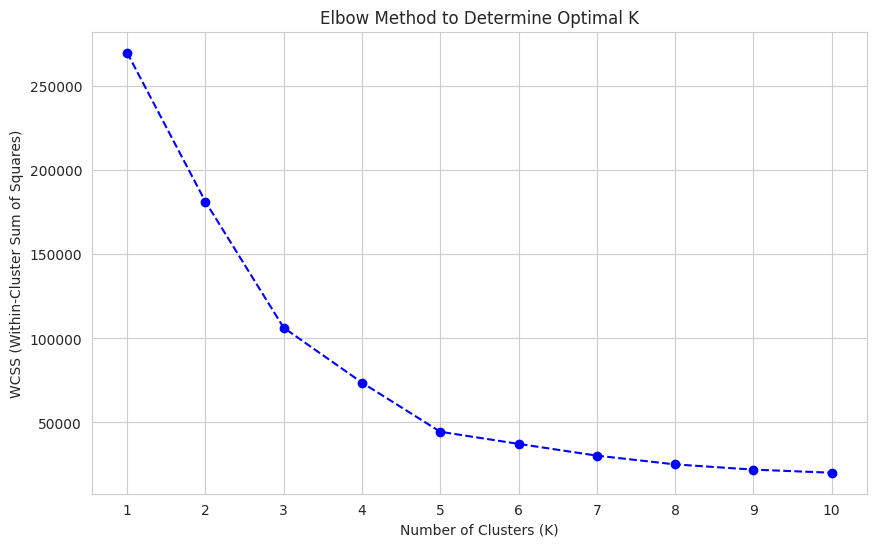

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns # For better aesthetics in plots

# Set a style for plots (optional, but makes them look nicer)
sns.set_style("whitegrid")

wcss = [] # Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) values

# Loop through a range of possible cluster numbers (e.g., from 1 to 10)
for i in range(1, 11):
    # Create a KMeans model instance
    # n_clusters=i: The number of clusters for this iteration
    # init='k-means++': Smart initialization to help convergence
    # random_state=42: Ensures reproducibility of results
    # n_init=10: Suppresses a future warning by explicitly setting the number of initializations
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

    # Fit the KMeans model to our data (X)
    kmeans.fit(X)

    # Append the WCSS (inertia) of the current model to our list
    wcss.append(kmeans.inertia_)

# Now, plot the Elbow Method graph
plt.figure(figsize=(10, 6)) # Set the size of the plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue') # Plot the WCSS values
plt.title('Elbow Method to Determine Optimal K') # Title of the plot
plt.xlabel('Number of Clusters (K)') # Label for the x-axis
plt.ylabel('WCSS (Within-Cluster Sum of Squares)') # Label for the y-axis
plt.xticks(range(1, 11)) # Ensure x-axis ticks are at integer values
plt.grid(True) # Add a grid for readability
plt.show() # Display the plot

In [5]:
# Based on the Elbow Method plot, we'll choose the optimal number of clusters
# For this dataset, K=5 is a common and reasonable choice.
optimal_k = 5

# Initialize the KMeans model with the optimal number of clusters
# init='k-means++': Smart initialization to help convergence
# random_state=42: Ensures reproducibility of results
# n_init=10: Suppresses a future warning by explicitly setting the number of initializations
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the KMeans model to your features (X) and predict the cluster for each customer
# y_kmeans will contain an array of cluster labels (0, 1, 2, 3, 4 for K=5) for each customer
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels back to your original DataFrame (df) for easier analysis
# This allows you to see which cluster each customer belongs to alongside their original data
df['Cluster'] = y_kmeans

print("First 5 rows of the DataFrame with new 'Cluster' column:")
print(df.head())

# You can also see the distribution of customers across the clusters
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())

First 5 rows of the DataFrame with new 'Cluster' column:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Number of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


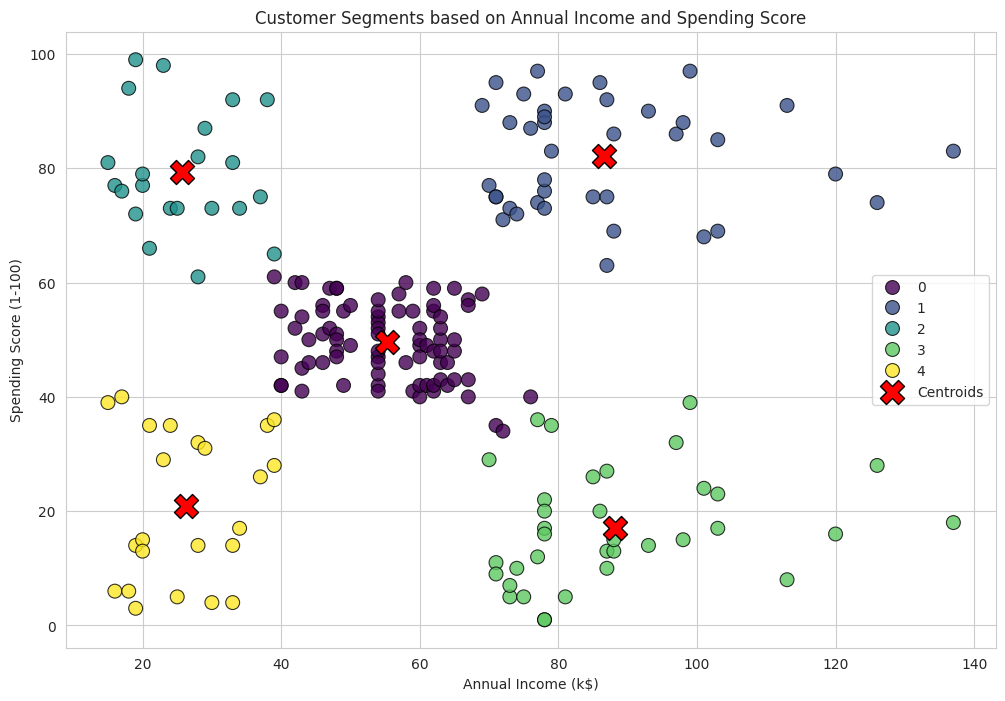

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns # Already imported, but good practice to include for context

plt.figure(figsize=(12, 8)) # Set the size of the plot for better readability

# Create a scatter plot of Annual Income vs. Spending Score
# 'hue='Cluster'' will color-code the points based on their assigned cluster
# 'palette='viridis'' uses a nice color scheme
# 's=100' sets the size of the points
# 'alpha=0.8' makes the points slightly transparent for better overlap visualization
# 'edgecolor='k'' adds a black edge to each point
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.8, edgecolor='k')

# Plot the cluster centroids (the centers of each cluster)
# The 'kmeans.cluster_centers_' attribute contains the coordinates of these centers
# [:, 0] gets all x-coordinates (Annual Income)
# [:, 1] gets all y-coordinates (Spending Score)
# 's=300' makes the centroids larger
# 'c='red'' makes them red
# 'marker='X'' displays them as 'X' marks
# 'label='Centroids'' adds them to the legend
# 'edgecolor='black'' adds a black border to the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids', edgecolor='black')

plt.title('Customer Segments based on Annual Income and Spending Score') # Title of the plot
plt.xlabel('Annual Income (k$)') # Label for the x-axis
plt.ylabel('Spending Score (1-100)') # Label for the y-axis
plt.legend() # Display the legend to show what each color/marker represents
plt.grid(True) # Add a grid for readability
plt.show() # Display the plot

In [7]:
# Get the mean of each feature for each cluster
# This will show the average income and spending score for customers in each segment
print("--- Cluster Characteristics (Mean Values) ---")
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

# You can also look at the size of each cluster again for convenience
print("\n--- Cluster Sizes ---")
print(df['Cluster'].value_counts().sort_index())

--- Cluster Characteristics (Mean Values) ---
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

--- Cluster Sizes ---
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
